SCRAPING DATA

In [121]:
!pip install google-play-scraper


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: D:\Data-Mining\JKN\.venv\Scripts\python.exe -m pip install --upgrade pip


In [122]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [123]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'app.bpjs.mobile',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000, 
    filter_score_with=None
)

In [124]:
df_jkn = pd.DataFrame(np.array(result),columns=['review'])
df_jkn = df_jkn.join(pd.DataFrame(df_jkn.pop('review').tolist()))
df_jkn.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,73e3840b-adc3-418c-ac35-5538c4bba1fd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi gak jelas, sering bug, sering error, ...",1,52,4.12.0,2025-05-18 18:27:07,Mohon maaf atas ketidaknyamanannya. Terkait ke...,2025-05-20 14:03:19,4.12.0
1,aacf24e7-c74c-4c3b-8d40-6e74bf5a1ae6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,saya mau daftar antri lagi buat periksa tp sel...,1,93,4.12.0,2025-05-16 16:48:42,None,NaT,4.12.0
2,1d120b7c-b6b2-42c6-867a-334ed590996d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,904,4.12.0,2025-05-01 11:33:24,None,NaT,4.12.0
3,9f905eda-fc9b-43c2-81c0-90c7c8727ae8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,724,4.12.0,2025-05-02 14:08:30,Mohon maaf atas ketidaknyamanannya. Pastikan j...,2025-05-02 14:06:28,4.12.0
4,008e43b5-3325-4288-9ded-be4dfab88132,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,596,4.12.0,2025-04-23 18:50:28,Mohon maaf atas ketidaknyamanannya. Pastikan j...,2025-04-24 14:35:24,4.12.0


In [125]:
df_jkn.to_csv("data/data_scraping2.csv", index = False)

In [126]:
jkn_mobile = pd.read_csv('data/data_scraping2.csv')

DATA UNDERSTANDING

In [127]:
len(jkn_mobile.index)

10000

In [128]:
jkn_mobile[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,1,2025-05-18 18:27:07,"Aplikasi gak jelas, sering bug, sering error, ..."
1,Pengguna Google,1,2025-05-16 16:48:42,saya mau daftar antri lagi buat periksa tp sel...
2,Pengguna Google,1,2025-05-01 11:33:24,"Aplikasi Rusak!! Issue critical gak fix""dari t..."
3,Pengguna Google,1,2025-05-02 14:08:30,"Kirain cuman sendiri yg OTPnya ga ke kirim, li..."
4,Pengguna Google,1,2025-04-23 18:50:28,"Aplikasi jelek, sebenernya dibuat untuk memuda..."


In [129]:
jkn_mobile=jkn_mobile[['content', 'score']]

In [130]:
jkn_mobile.head()

,content,score
0,"Aplikasi gak jelas, sering bug, sering error, ...",1
1,saya mau daftar antri lagi buat periksa tp sel...,1
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1


In [131]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
jkn_mobile['Label'] = jkn_mobile ['score'].apply(pelabelan)
jkn_mobile.head(50)

,content,score,Label
0,"Aplikasi gak jelas, sering bug, sering error, ...",1,Negatif
1,saya mau daftar antri lagi buat periksa tp sel...,1,Negatif
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,Negatif
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,Negatif
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
5,aplikasi jelek bukannya membantu memudahkan ma...,1,Negatif
6,sangat menyebalkan!!! dulu sudah daftar tp ga ...,1,Negatif
7,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
8,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif
9,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif


In [132]:
jkn_mobile.to_csv("data/scrapped_data2.csv", index = False)

In [133]:
import pandas as pd
pd.set_option('display.max_columns', None)
jkn_mobile = pd.read_csv('data/scrapped_data2.csv')
jkn_mobile.head(50)

,content,score,Label
0,"Aplikasi gak jelas, sering bug, sering error, ...",1,Negatif
1,saya mau daftar antri lagi buat periksa tp sel...,1,Negatif
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,Negatif
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,Negatif
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
5,aplikasi jelek bukannya membantu memudahkan ma...,1,Negatif
6,sangat menyebalkan!!! dulu sudah daftar tp ga ...,1,Negatif
7,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
8,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif
9,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif


In [134]:
jkn_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   Label    9316 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [135]:
jkn_mobile.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [136]:
jkn_mobile.isna().any()

content    False
score      False
Label       True
dtype: bool

In [137]:
jkn_mobile.describe()

,score
count,10000.000000
mean,1.667400
std,1.251453
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [138]:
jkn_mobile.isnull().sum()

content      0
score        0
Label      684
dtype: int64

In [139]:
jkn_mobile.dropna(subset=['Label'],inplace = True)

In [140]:
jkn_mobile.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [141]:
jkn_mobile.head(10)

,content,score,Label
0,"Aplikasi gak jelas, sering bug, sering error, ...",1,Negatif
1,saya mau daftar antri lagi buat periksa tp sel...,1,Negatif
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,Negatif
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,Negatif
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
5,aplikasi jelek bukannya membantu memudahkan ma...,1,Negatif
6,sangat menyebalkan!!! dulu sudah daftar tp ga ...,1,Negatif
7,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
8,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif
9,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif


In [142]:
import re
def clean_text(df, content_field_name, new_text_field_name):
    df[new_text_field_name] = df[content_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

In [143]:
jkn_mobile['text_clean'] = jkn_mobile['content']
data_clean = clean_text(jkn_mobile, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,"Aplikasi gak jelas, sering bug, sering error, ...",1,Negatif,Aplikasi gak jelas sering bug sering error rib...
1,saya mau daftar antri lagi buat periksa tp sel...,1,Negatif,saya mau daftar antri lagi buat periksa tp sel...
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,Negatif,Aplikasi Rusak Issue critical gak fixdari tahu...
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,Negatif,Kirain cuman sendiri yg OTPnya ga ke kirim lia...
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,Aplikasi jelek sebenernya dibuat untuk memudah...
5,aplikasi jelek bukannya membantu memudahkan ma...,1,Negatif,aplikasi jelek bukannya membantu memudahkan ma...
6,sangat menyebalkan!!! dulu sudah daftar tp ga ...,1,Negatif,sangat menyebalkan dulu sudah daftar tp ga bis...
7,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,Aplikasi macam apa iniiiimau daftar aja susah ...
8,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,Aplikasi sampah proses pendaftaran dibuat ruwe...
9,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,APLIKASI SAMPAH dana buat bikin aplikasi di KO...


In [144]:
jkn_mobile.to_csv("data/jknpreprocessing2.csv", index = False)

In [1]:
import pandas as pd
df = pd.read_csv('data/jknpreprocessing2.csv')
df.head(10)

,content,score,Label,text_clean
0,"Aplikasi gak jelas, sering bug, sering error, ...",1,Negatif,Aplikasi gak jelas sering bug sering error rib...
1,saya mau daftar antri lagi buat periksa tp sel...,1,Negatif,saya mau daftar antri lagi buat periksa tp sel...
2,"Aplikasi Rusak!! Issue critical gak fix""dari t...",1,Negatif,Aplikasi Rusak Issue critical gak fixdari tahu...
3,"Kirain cuman sendiri yg OTPnya ga ke kirim, li...",1,Negatif,Kirain cuman sendiri yg OTPnya ga ke kirim lia...
4,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,Aplikasi jelek sebenernya dibuat untuk memudah...
5,aplikasi jelek bukannya membantu memudahkan ma...,1,Negatif,aplikasi jelek bukannya membantu memudahkan ma...
6,sangat menyebalkan!!! dulu sudah daftar tp ga ...,1,Negatif,sangat menyebalkan dulu sudah daftar tp ga bis...
7,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,Aplikasi macam apa iniiiimau daftar aja susah ...
8,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,Aplikasi sampah proses pendaftaran dibuat ruwe...
9,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,APLIKASI SAMPAH dana buat bikin aplikasi di KO...


In [2]:
print(df['Label'].value_counts())

Label
Negatif    8150
Positif    1166
Name: count, dtype: int64


In [3]:
from sklearn.utils import resample

#memisahkan data per label
positif = df[df['Label'] == 'Positif']
negatif = df[df['Label'] == 'Negatif']

#oversampling label positif
positif_oversampled = resample(positif,
                               replace=True,
                               n_samples=8000,   #jumlah oversampling
                               random_state=42)

#gabungkan kembali
df_oversampled = pd.concat([negatif, positif_oversampled])

print(df_oversampled['Label'].value_counts())

Label
Negatif    8150
Positif    8000
Name: count, dtype: int64


In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled['content'], df_oversampled['Label'], test_size = 0.20, random_state = 42)

In [5]:
train_df = pd.DataFrame({'content': X_train, 'Label': y_train})
test_df = pd.DataFrame({'content': X_test, 'Label': y_test})

In [149]:
import re
def  clean_text(df, text_field, new_text_field_name):
    train_df[new_text_field_name] = train_df[text_field].str.lower()
    train_df[new_text_field_name] = train_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    train_df[new_text_field_name] = train_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return train_df
train_df.head()

,content,Label
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif


In [150]:
train_df['text_clean'] = train_df['content'].str.lower()
train_df['text_clean']
data_clean = clean_text(train_df, 'content', 'text_clean')
data_clean.head(10)

,content,Label,text_clean
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif,ini jkn kenapa sih tiga peserta tapi yang ada...
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif,gimana c mau dftar aja susah bgtverifikasi wja...
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif,masih untung gua kasih bintang nungu sms aja...
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif,tmen yg gakbisa bukak menu yg terkunci coba di...
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif,kalau emng mau buat aplikasi minimal di uji du...
9496,Mohon bantuannya. Ini Aplilasi sudah 3x login ...,Positif,mohon bantuannya ini aplilasi sudah x login be...
1572,"Alhamdulillah, sudah bisa ubah faskes I di apl...",Positif,alhamdulillah sudah bisa ubah faskes i di apli...
3821,"Bagus sudah terpasang di smartphone ,hanya utk...",Positif,bagus sudah terpasang di smartphone hanya utk ...
7120,Sudah bagus.. sudah cukup stabil.. tapi saat m...,Positif,sudah bagus sudah cukup stabil tapi saat mau c...
6957,"Saya kan lupa password, kemudian saya coba kli...",Negatif,saya kan lupa password kemudian saya coba klik...


In [151]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
my_stopwords = (['yang', 'dan', 'di', 'dari', 'kalo', 'yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'ku',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg', 'gw','guys','gtu','fyi','epek',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't','nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru', 'ypadahal', 'cokk', 'utuk','untuk', 'kasih','sangatsangat','sanggat', 'the',
                       'mulu','jd','jdi','gk','oe'])
stop.extend(my_stopwords)
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62877/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,Label,text_clean,text_StopWord
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif,ini jkn kenapa sih tiga peserta tapi yang ada...,jkn peserta daftar peserta status kepesertaan ...
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif,gimana c mau dftar aja susah bgtverifikasi wja...,gimana c dftar susah bgtverifikasi wjah bisama...
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif,masih untung gua kasih bintang nungu sms aja...,untung gua bintang nungu sms kaya nungu aplika...
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif,tmen yg gakbisa bukak menu yg terkunci coba di...,tmen gakbisa bukak menu terkunci coba log in u...
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif,kalau emng mau buat aplikasi minimal di uji du...,emng aplikasi minimal uji sistem eror daftar e...
9496,Mohon bantuannya. Ini Aplilasi sudah 3x login ...,Positif,mohon bantuannya ini aplilasi sudah x login be...,mohon bantuannya aplilasi x login beda user lo...
1572,"Alhamdulillah, sudah bisa ubah faskes I di apl...",Positif,alhamdulillah sudah bisa ubah faskes i di apli...,alhamdulillah ubah faskes i aplikasi memudahka...
3821,"Bagus sudah terpasang di smartphone ,hanya utk...",Positif,bagus sudah terpasang di smartphone hanya utk ...,bagus terpasang smartphone verifikasi pendafta...
7120,Sudah bagus.. sudah cukup stabil.. tapi saat m...,Positif,sudah bagus sudah cukup stabil tapi saat mau c...,bagus stabil chekin buka menu antrean layanan ...
6957,"Saya kan lupa password, kemudian saya coba kli...",Negatif,saya kan lupa password kemudian saya coba klik...,lupa password coba klik lupa password masukan ...


In [152]:
import nltk
nltk.download('punkt')  # Ensure the main punkt package is downloaded
nltk.download('punkt_tab') # Download the missing punkt_tab resource
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(50)

[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\62877/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,Label,text_clean,text_StopWord,text_tokens
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif,ini jkn kenapa sih tiga peserta tapi yang ada...,jkn peserta daftar peserta status kepesertaan ...,"[jkn, peserta, daftar, peserta, status, kepese..."
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif,gimana c mau dftar aja susah bgtverifikasi wja...,gimana c dftar susah bgtverifikasi wjah bisama...,"[gimana, c, dftar, susah, bgtverifikasi, wjah,..."
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif,masih untung gua kasih bintang nungu sms aja...,untung gua bintang nungu sms kaya nungu aplika...,"[untung, gua, bintang, nungu, sms, kaya, nungu..."
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif,tmen yg gakbisa bukak menu yg terkunci coba di...,tmen gakbisa bukak menu terkunci coba log in u...,"[tmen, gakbisa, bukak, menu, terkunci, coba, l..."
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif,kalau emng mau buat aplikasi minimal di uji du...,emng aplikasi minimal uji sistem eror daftar e...,"[emng, aplikasi, minimal, uji, sistem, eror, d..."
9496,Mohon bantuannya. Ini Aplilasi sudah 3x login ...,Positif,mohon bantuannya ini aplilasi sudah x login be...,mohon bantuannya aplilasi x login beda user lo...,"[mohon, bantuannya, aplilasi, x, login, beda, ..."
1572,"Alhamdulillah, sudah bisa ubah faskes I di apl...",Positif,alhamdulillah sudah bisa ubah faskes i di apli...,alhamdulillah ubah faskes i aplikasi memudahka...,"[alhamdulillah, ubah, faskes, i, aplikasi, mem..."
3821,"Bagus sudah terpasang di smartphone ,hanya utk...",Positif,bagus sudah terpasang di smartphone hanya utk ...,bagus terpasang smartphone verifikasi pendafta...,"[bagus, terpasang, smartphone, verifikasi, pen..."
7120,Sudah bagus.. sudah cukup stabil.. tapi saat m...,Positif,sudah bagus sudah cukup stabil tapi saat mau c...,bagus stabil chekin buka menu antrean layanan ...,"[bagus, stabil, chekin, buka, menu, antrean, l..."
6957,"Saya kan lupa password, kemudian saya coba kli...",Negatif,saya kan lupa password kemudian saya coba klik...,lupa password coba klik lupa password masukan ...,"[lupa, password, coba, klik, lupa, password, m..."


In [153]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(50)

[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,Label,text_clean,text_StopWord,text_tokens
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif,ini jkn kenapa sih tiga peserta tapi yang ada...,jkn peserta daftar peserta status kepesertaan ...,"[jkn, peserta, daftar, peserta, status, kepese..."
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif,gimana c mau dftar aja susah bgtverifikasi wja...,gimana c dftar susah bgtverifikasi wjah bisama...,"[gimana, c, dftar, susah, bgtverifikasi, wjah,..."
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif,masih untung gua kasih bintang nungu sms aja...,untung gua bintang nungu sms kaya nungu aplika...,"[untung, gua, bintang, nungu, sms, kaya, nungu..."
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif,tmen yg gakbisa bukak menu yg terkunci coba di...,tmen gakbisa bukak menu terkunci coba log in u...,"[tmen, gakbisa, bukak, menu, terkunci, coba, l..."
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif,kalau emng mau buat aplikasi minimal di uji du...,emng aplikasi minimal uji sistem eror daftar e...,"[emng, aplikasi, minimal, uji, sistem, eror, d..."
9496,Mohon bantuannya. Ini Aplilasi sudah 3x login ...,Positif,mohon bantuannya ini aplilasi sudah x login be...,mohon bantuannya aplilasi x login beda user lo...,"[mohon, bantuannya, aplilasi, x, login, beda, ..."
1572,"Alhamdulillah, sudah bisa ubah faskes I di apl...",Positif,alhamdulillah sudah bisa ubah faskes i di apli...,alhamdulillah ubah faskes i aplikasi memudahka...,"[alhamdulillah, ubah, faskes, i, aplikasi, mem..."
3821,"Bagus sudah terpasang di smartphone ,hanya utk...",Positif,bagus sudah terpasang di smartphone hanya utk ...,bagus terpasang smartphone verifikasi pendafta...,"[bagus, terpasang, smartphone, verifikasi, pen..."
7120,Sudah bagus.. sudah cukup stabil.. tapi saat m...,Positif,sudah bagus sudah cukup stabil tapi saat mau c...,bagus stabil chekin buka menu antrean layanan ...,"[bagus, stabil, chekin, buka, menu, antrean, l..."
6957,"Saya kan lupa password, kemudian saya coba kli...",Negatif,saya kan lupa password kemudian saya coba klik...,lupa password coba klik lupa password masukan ...,"[lupa, password, coba, klik, lupa, password, m..."


In [154]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
import nltk
print(nltk.data.find('tokenizers/punkt'))

C:\Users\62877\nltk_data\tokenizers\punkt


In [156]:
import os
import nltk
nltk.data.path.append(os.path.expanduser('~/nltk_data'))
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [157]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: D:\Data-Mining\JKN\.venv\Scripts\python.exe -m pip install --upgrade pip


In [158]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

13200
------------------------
1 : jkn : jkn
2 : peserta : serta
3 : daftar : daftar
4 : status : status
5 : kepesertaan : serta
6 : anak : anak
7 : sya : sya
8 : aktiv : aktiv
9 : muncul : muncul
10 : normal : normal
11 : ko : ko
12 : gimana : gimana
13 : c : c
14 : dftar : dftar
15 : susah : susah
16 : bgtverifikasi : bgtverifikasi
17 : wjah : wjah
18 : bisamau : bisamau
19 : ganti : ganti
20 : no : no
21 : hp : hp
22 : klik : klik
23 : link : link
24 : dluudh : dluudh
25 : gt : gt
26 : jugatolong : jugatolong
27 : donk : donk
28 : dperbaikimau : dperbaikimau
29 : niat : niat
30 : bantu : bantu
31 : cbaru : cbaru
32 : x : x
33 : verifikasi : verifikasi
34 : susahy : susahy
35 : mnta : mnta
36 : ampun : ampun
37 : untung : untung
38 : gua : gua
39 : bintang : bintang
40 : nungu : nungu
41 : sms : sms
42 : kaya : kaya
43 : aplikasi : aplikasi
44 : ruwet : ruwet
45 : tmen : tmen
46 : gakbisa : gakbisa
47 : bukak : bukak
48 : menu : menu
49 : terkunci : kunci
50 : coba : coba
51 : log : 

,content,Label,text_clean,text_StopWord,text_tokens,text_steamindo
6506,ini jkn kenapa sih ??? tiga peserta tapi yang ...,Negatif,ini jkn kenapa sih tiga peserta tapi yang ada...,jkn peserta daftar peserta status kepesertaan ...,"[jkn, peserta, daftar, peserta, status, kepese...",jkn serta daftar serta status serta anak sya a...
1338,"Gimana c mau dftar aja susah bgt,verifikasi wj...",Negatif,gimana c mau dftar aja susah bgtverifikasi wja...,gimana c dftar susah bgtverifikasi wjah bisama...,"[gimana, c, dftar, susah, bgtverifikasi, wjah,...",gimana c dftar susah bgtverifikasi wjah bisama...
4289,"masih untung gua kasih 1 bintang , nungu sms a...",Negatif,masih untung gua kasih bintang nungu sms aja...,untung gua bintang nungu sms kaya nungu aplika...,"[untung, gua, bintang, nungu, sms, kaya, nungu...",untung gua bintang nungu sms kaya nungu aplika...
9664,Tmen2 yg gakbisa bukak menu yg terkunci coba d...,Positif,tmen yg gakbisa bukak menu yg terkunci coba di...,tmen gakbisa bukak menu terkunci coba log in u...,"[tmen, gakbisa, bukak, menu, terkunci, coba, l...",tmen gakbisa bukak menu kunci coba log in ulan...
1420,kalau emng mau buat aplikasi minimal di uji du...,Negatif,kalau emng mau buat aplikasi minimal di uji du...,emng aplikasi minimal uji sistem eror daftar e...,"[emng, aplikasi, minimal, uji, sistem, eror, d...",emng aplikasi minimal uji sistem eror daftar e...
9496,Mohon bantuannya. Ini Aplilasi sudah 3x login ...,Positif,mohon bantuannya ini aplilasi sudah x login be...,mohon bantuannya aplilasi x login beda user lo...,"[mohon, bantuannya, aplilasi, x, login, beda, ...",mohon bantu aplilasi x login beda user login u...
1572,"Alhamdulillah, sudah bisa ubah faskes I di apl...",Positif,alhamdulillah sudah bisa ubah faskes i di apli...,alhamdulillah ubah faskes i aplikasi memudahka...,"[alhamdulillah, ubah, faskes, i, aplikasi, mem...",alhamdulillah ubah faskes i aplikasi mudah gun...
3821,"Bagus sudah terpasang di smartphone ,hanya utk...",Positif,bagus sudah terpasang di smartphone hanya utk ...,bagus terpasang smartphone verifikasi pendafta...,"[bagus, terpasang, smartphone, verifikasi, pen...",bagus pasang smartphone verifikasi daftar gima...
7120,Sudah bagus.. sudah cukup stabil.. tapi saat m...,Positif,sudah bagus sudah cukup stabil tapi saat mau c...,bagus stabil chekin buka menu antrean layanan ...,"[bagus, stabil, chekin, buka, menu, antrean, l...",bagus stabil chekin buka menu antre layan load...
6957,"Saya kan lupa password, kemudian saya coba kli...",Negatif,saya kan lupa password kemudian saya coba klik...,lupa password coba klik lupa password masukan ...,"[lupa, password, coba, klik, lupa, password, m...",lupa password coba klik lupa password masuk em...


In [159]:
data_clean.to_csv('data/hasil_TextPreProcessing_jkn.csv', index= False)

In [160]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(train_df['content'])
tfidf_test = tfidf_vectorizer.transform(test_df['content'])

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12920,)
(12920,)
(3230,)
(3230,)


In [166]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(train_df['content'])

CountVectorizer()

In [170]:
X_train = vectorizer.transform(train_df['content'])
X_test = vectorizer.transform(test_df['content'])

In [171]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(tfidf_train, train_df['Label'])

SVC()

In [172]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [173]:
y_pred = svc.predict(tfidf_test)

In [174]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_df['Label'], y_pred)

In [177]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = SVC()
clf.fit(X_train, train_df['Label'])
predicted = clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(test_df['Label'],predicted))


print(f'\nconfusion_matrix:\n {confusion_matrix(test_df["Label"], predicted)}')
print('\n====================================================\n')
print(classification_report(test_df['Label'], predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('data/hasil_TextPreProcessing_jkn.csv')

SVM Accuracy: 0.9708978328173374

confusion_matrix:
 [[1591   56]
 [  38 1545]]


              precision    recall  f1-score   support

     Negatif       0.98      0.97      0.97      1647
     Positif       0.97      0.98      0.97      1583

    accuracy                           0.97      3230
   macro avg       0.97      0.97      0.97      3230
weighted avg       0.97      0.97      0.97      3230



C:\Users\62877\AppData\Local\Temp\ipykernel_15056\2406865919.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')


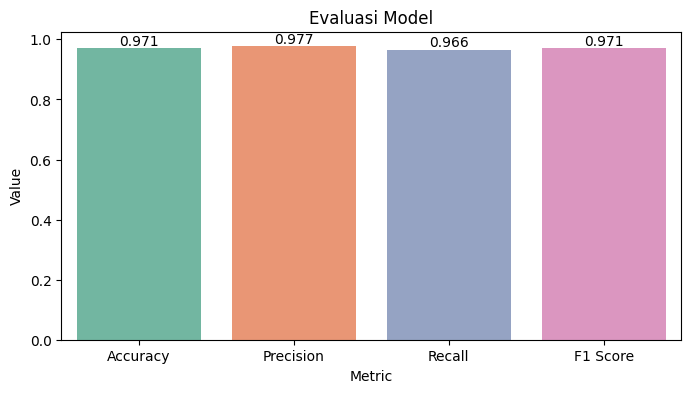

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(8, 4))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

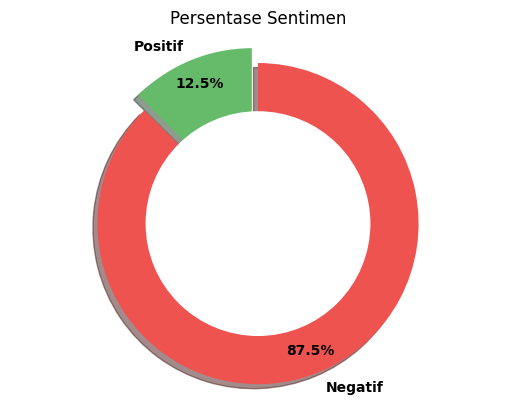

In [180]:
import matplotlib.pyplot as plt
import numpy as np

positif_count = jkn_mobile[jkn_mobile['Label'] == 'Positif'].shape[0]
negatif_count = jkn_mobile[jkn_mobile['Label'] == 'Negatif'].shape[0]

labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

colors = ['#66bb6a', '#ef5350']

explode = (0.1, 0)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

for text in texts:
    text.set_color('black')
    text.set_weight('bold')

ax.axis('equal')

plt.title('Persentase Sentimen')

plt.show()


In [181]:
!pip install seaborn
df = pd.read_csv('data/data_scraping2.csv')

print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0= {len(df [df['score'] ==1.0])} rows")
print(f"rating 2.0 = {len (df[df['score']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['score']==3.0])} rows")
print(f"rating 4.0 = {len(df [df['score']== 4.0])} rows")
print(f"rating 5.0= {len(df[df['score']==5.0])} rows")
unique_scores = df['score'].unique()

# Buat palet warna kustom dengan rating 1 berwarna merah
custom_palette = {str(score): 'red' if score == 1.0
                  else 'orange' if score == 2.0
                  else 'yellow' if score == 3.0
                  else 'blue' if score == 4.0
                  else 'green' for score in unique_scores}

Input data has 10000 rows and 11 columns
rating 1.0= 7188 rows
rating 2.0 = 962 rows
rating 3.0 = 684 rows
rating 4.0 = 320 rows
rating 5.0= 846 rows



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: D:\Data-Mining\JKN\.venv\Scripts\python.exe -m pip install --upgrade pip


Number of null in label: 0
Number of null in text: 0


C:\Users\62877\AppData\Local\Temp\ipykernel_15056\3327830504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette=custom_palette);


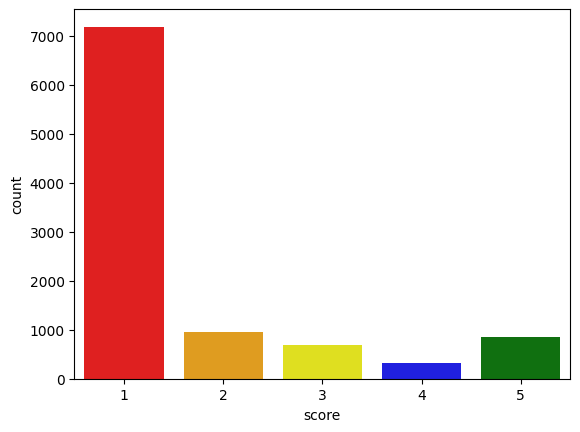

In [182]:
import seaborn as sns

# Hitung jumlah nilai null di kolom 'score' dan 'text'
print(f"Number of null in label: {df['score'].isnull().sum()}")
print(f"Number of null in text: {df['score'].isnull().sum()}")

sns.countplot(x='score', data=df, palette=custom_palette);

In [206]:
from wordcloud import WordCloud
import pandas as pd

df = pd.read_csv('data/hasil_TextPreProcessing_jkn.csv')

df_negative = df[df['Label'] == 'Negatif']
df_positive = df[df['Label'] == 'Positif']

negative_list = df_negative['text_steamindo'].tolist()
positive_list = df_positive['text_steamindo'].tolist()

filtered_negative = " ".join(str(teks) for teks in negative_list).lower()
filtered_positive = " ".join(str(teks) for teks in positive_list).lower()


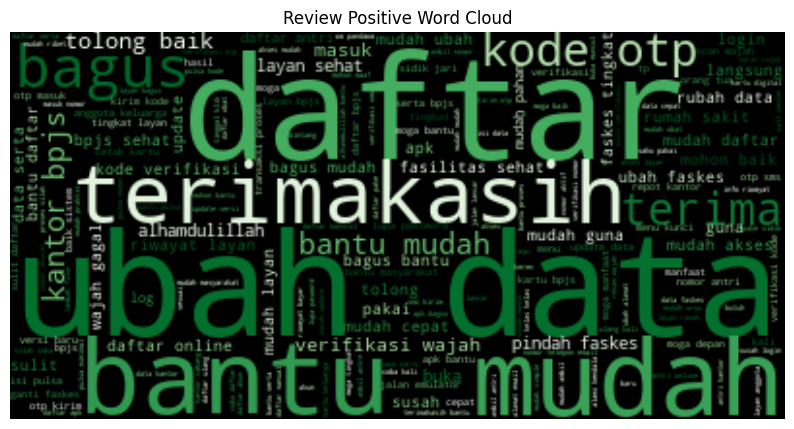

In [208]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = set(STOPWORDS) 
custom_stopwords.update(["aplikasi", "jkn", "hp", "mobile"]) 

wordcloud = WordCloud(
    stopwords=custom_stopwords,  #stopwords kustom
    max_font_size=100,
    margin=0,
    background_color="black",
    colormap="Greens"
).generate(filtered_positive)

plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Positive Word Cloud")
plt.show()

In [209]:
import pandas as pd

word_freq = wordcloud.words_

df_wordcloud = pd.DataFrame(word_freq.items(), columns=["Kata", "Bobot"])

top_10_words = df_wordcloud.nlargest(10, "Bobot")

print(top_10_words)

          Kata     Bobot
0    ubah data  1.000000
1       daftar  0.997925
2        mudah  0.968880
3        bantu  0.950207
4  terimakasih  0.599585
5        bagus  0.593361
6     kode otp  0.589212
7       terima  0.543568
8  bantu mudah  0.483402
9  kantor bpjs  0.481328


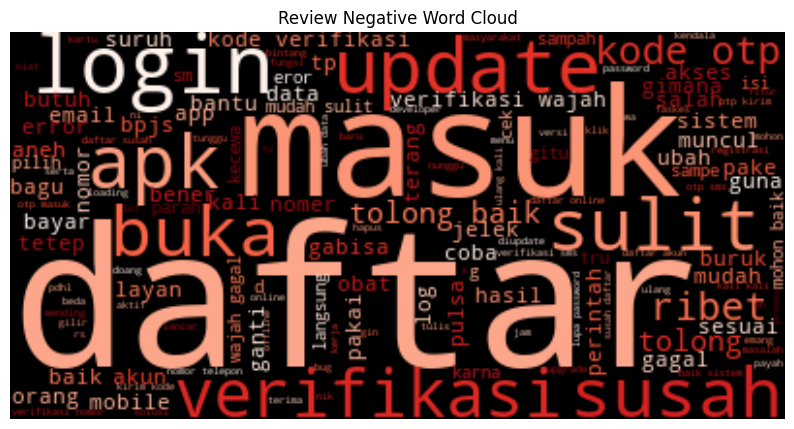

In [210]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = set(STOPWORDS)  #Stopwords bawaan
custom_stopwords.update(["aplikasi", "jkn", "hp"])  

wordcloud = WordCloud(
    stopwords=custom_stopwords,  #stopwords kustom
    max_font_size=100,
    margin=0,
    background_color="black",
    colormap="Reds"
).generate(filtered_negative)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Negative Word Cloud")
plt.show()

In [211]:
import pandas as pd

# Ekstrak kata-kata dan bobotnya dari WordCloud
word_freq = wordcloud.words_

df_wordcloud = pd.DataFrame(word_freq.items(), columns=["Kata", "Bobot"])

top_10_words = df_wordcloud.nlargest(10, "Bobot")

print(top_10_words)

         Kata     Bobot
0      daftar  1.000000
1       masuk  0.535935
2       login  0.431699
3      update  0.369824
4         apk  0.356973
5       sulit  0.329843
6       susah  0.316040
7        buka  0.315564
8  verifikasi  0.309852
9    kode otp  0.298429
